In [ ]:
# TODO:
1. Improve stitch algorithm
    a. filtering??? KF
    b. use lane information to restrict measurements
    
2. visualization - space-time diagram
    a. need lane information - try clustering
    b. need distance from lane start point

In [2]:
# save df to csv

from utils import*
import os.path
from os import path

data_path = pathlib.Path().absolute().joinpath('tracking_outputs')
output_path = data_path.joinpath('stitched')

file_name = 'record_p3c6_00000_track_outputs.csv'
file_dir = data_path.joinpath(file_name)
new_dir = output_path.joinpath('stitched_'+file_name)

df = read_data(file_dir)
# df = read_new_data(new_dir)


In [3]:
df = calc_distance(df, file_name)
df

,Frame #,Timestamp,ID,Object class,BBox xmin,BBox ymin,BBox xmax,BBox ymax,Generation method,lat,lon,lane,distance
0,0,1.747832e+09,0,sedan,3372.709961,3459.042480,675.655396,769.401245,Detector,36.000966,-86.605619,7,145.234966
1,0,1.747832e+09,1,sedan,3082.803223,3152.555664,251.485077,311.367523,Detector,36.000649,-86.605015,4,82.987143
2,0,1.747832e+09,2,sedan,2712.231934,2792.488281,217.848663,288.589142,Detector,36.000720,-86.604930,3,163.083527
3,0,1.747832e+09,3,sedan,2503.280518,2580.568115,156.640900,224.000275,Detector,36.000708,-86.604784,1,170.290680
4,0,1.747832e+09,4,SUV,2863.397217,3020.922119,1321.758057,1470.228027,Detector,36.001335,-86.606026,6,200.399331
...,...,...,...,...,...,...,...,...,...,...,...,...,...
103891,8927,1.747832e+09,8567,sedan,2326.086914,2447.251953,583.731506,673.828308,Localizer,36.001111,-86.605440,3,99.904682
103892,8927,1.747832e+09,8568,sedan,3493.305908,3558.740234,284.319031,348.986664,Localizer,36.000575,-86.605115,7,82.342206
103893,8927,1.747832e+09,8569,sedan,2916.145752,2966.692627,26.613665,72.577919,Localizer,36.000368,-86.604466,3,220.339841
103894,8927,1.747832e+09,8570,SUV,2579.828125,2651.992188,107.784927,177.938538,Localizer,36.000625,-86.604683,1,183.245398


In [2]:
df=df.iloc[::5, :]

In [18]:
# visualize by lane
import mplcursors
N = 40000;
fig, ax = plt.subplots(figsize=(10,6))
%pylab

mplcursors.cursor(hover=True)
plt.scatter(x=df.lat, y=df.lon, s=1, alpha=.8)
plt.plot([36.001777, 36.000354], [-86.606115, -86.604256], 'ro-')
plt.plot([36.001765, 36.000319], [-86.606154, -86.604287], 'ro-')
plt.plot([36.001751, 36.000256], [-86.606196, -86.604268], 'ro-')
plt.plot([36.001738, 36.000224], [-86.606235, -86.604283], 'ro-')
plt.plot([36.001669, 36.000145], [-86.606354, -86.604334], 'ro-')
plt.plot([36.001666, 36.000121], [-86.606400, -86.604366], 'ro-')
plt.plot([36.001661, 36.000105], [-86.606452, -86.604397], 'ro-')
plt.plot([36.001646, 36.000084], [-86.606495, -86.604429], 'ro-')

plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('longitude', fontsize = 20)
plt.xlim(df['lat'].min()-0.0005,df['lat'].max()+0.0005)
plt.ylim(df['lon'].min()-0.0005,df['lon'].max()+0.0005)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 10)
ax = plt.gca()
ax.format_coord = lambda x,y: '%.6f, %.6f' % (x,y)
plt.show()

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [1]:
draw_map(df,36.0032, -86.607580, 100)

NameError: name 'draw_map' is not defined

In [21]:
import importlib
import utils
importlib.reload(utils)

df = utils.calc_distance(df, file_name)

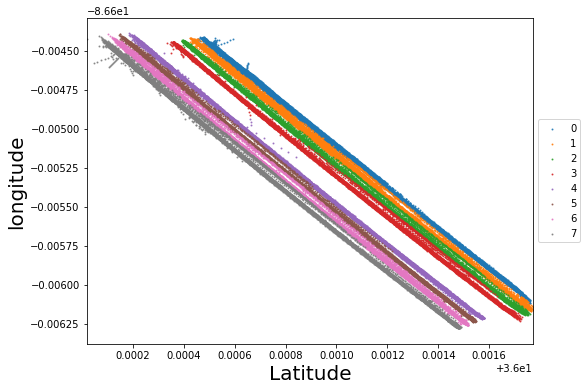

In [5]:
groups = df.groupby('lane')
groupList = list(groups.groups)

# plt.figure(figsize=(40, 40))
fig, ax = plt.subplots(figsize=(8,6))
start = 5
end = 60
for i in groupList:   
    group = groups.get_group(i)
    plt.scatter(x=group.lat, y=group.lon, s=1, alpha=.8, label=group.loc[group.index[0],'lane'])
# print(groups.get_group(groupList[end]).Timestamp.values[-1]-groups.get_group(groupList[start]).Timestamp.values[0])
# plt.plot([36.00295, 36.00348], [-86.60749, -86.60806], 'ro-')
# plt.plot([36.00293, 36.00346], [-86.60754, -86.60810], 'ro-')
# plt.plot([36.00291, 36.003441], [-86.607575, -86.60813], 'ro-')
# plt.plot([36.002885, 36.003415], [-86.6076, -86.60818], 'ro-')
# plt.plot([36.00282, 36.0033], [-86.60768, -86.6082], 'ro-')
# plt.plot([36.00279, 36.00323], [-86.60774, -86.6082], 'ro-')
plt.xlabel('Latitude', fontsize = 20)
plt.ylabel('longitude', fontsize = 20)
plt.xlim(df['lat'].min(),df['lat'].max())
plt.ylim(df['lon'].min()-0.0001,df['lon'].max()+0.0001)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), fontsize = 10)
plt.show()

In [22]:
# extract lane info (most importantly, the GPS location of the boundary of the bbx)
startpts = np.array([[36.00295, -86.60749],
                     [36.00293, -86.60754],
                     [36.00291, -86.607575],
                     [36.002885, -86.6076],
                     [36.00282, -86.60768],
                     [36.00279, -86.60774]
                    ])
endpts = np.array([[36.00348, -86.60806],
                     [36.00346, -86.60810],
                     [36.003441, -86.60813],
                     [36.003415, -86.60818],
                     [36.0033, -86.6082],
                     [36.00323, -86.6082]
                    ])